# BC3 DATA

In [1]:
#Text classification using machine learning Algorithms for BBC News
import pandas as pd
import numpy as np
import sklearn
from sklearn.datasets import load_files
import sys
from time import time
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import RidgeClassifier
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.extmath import density
from sklearn import metrics
from sklearn.model_selection import train_test_split
import nltk

## Fetching & Training the data

In [2]:
bbcdir = r'C:\Users\deadpool\Documents\mini_project\BC3_part1.csv'
bbc_train = pd.read_csv(bbcdir)
data=bbc_train['Abstract']
target=bbc_train['Label']

In [3]:
print(len(data))
bbc_vec = CountVectorizer(min_df=2, tokenizer=nltk.word_tokenize, encoding='latin-1')
bbc_counts = bbc_vec.fit_transform(data)
tfidf_transformer = TfidfTransformer()
bbc_tfidf = tfidf_transformer.fit_transform(bbc_counts)
print(bbc_tfidf.shape)
X_train, X_test, y_train, y_test = train_test_split(
    bbc_tfidf, target, test_size = 0.20, random_state = 12)

print('data loaded')

2280
(2280, 11961)
data loaded


In [4]:
#bbc_train.target_names

##  Using the function

In [5]:
def benchmark(clf,name):
    print('_' * 80)
    print("Training: ")
	
    t0 = time()
    clf.fit(X_train, y_train)
    train_time = time() - t0
    print("train time: %0.3fs" % train_time)
	
    t0 = time() 
    pred = clf.predict(X_test)
    test_time = time() - t0
    print("test time:  %0.3fs" % test_time)
	
    score = metrics.accuracy_score(y_test, pred)
    kappa=metrics.cohen_kappa_score(y_test,pred)
    print("accuracy:   %0.4f" % score)
    print("\nHamming_loss=%0.4f" %metrics.hamming_loss(y_test,pred))
    print("Kappa Score:   %0.4f" %kappa)
    print("\nprecision score=%0.4f" %metrics.precision_score(y_test,pred,average='macro'))
    print("\nRecall Score=%0.4f" %metrics.recall_score(y_test,pred,average='macro'))
    print("\nF1-Score score=%0.4f" %metrics.f1_score(y_test,pred,average='macro'))
    print("confusion matrix:")
    print(metrics.confusion_matrix(y_test, pred))
    print()
#     print("classification report:")
#     print(metrics.classification_report(y_test, pred,target_names=target_names))
    clf_descr = str(clf).split('(')[0]
    class_name =str(name).split('(')[0]
    return class_name, score,train_time, test_time

## Printing the Results

In [6]:
results = []
#RESULTS=[NAME_OF_ALGO ACCURACY TRAIN_TIME TEST-TIME]
for clf, name in ((RidgeClassifier(tol=1e-2, solver="sag"), "Ridge"),
                  (Perceptron(max_iter=50, tol=1e-3),"PPN"),
                  (PassiveAggressiveClassifier(max_iter=50, tol=1e-3),"PA"),
                  (KNeighborsClassifier(n_neighbors=10), "kNN"),
                   (LinearSVC(penalty="l2", dual=False,tol=1e-3),"SVM"),
                   (tree.DecisionTreeClassifier(),"DT"),
                   (MultinomialNB(alpha=.01),"M_NB"),
                   (BernoulliNB(alpha=.01),"B_NB"),
                  (RandomForestClassifier(n_estimators=100), "RF"),
                  (SGDClassifier(alpha=.0001, max_iter=50,penalty="l1"),"SGd"),
                  (NearestCentroid(),"NC"),
                  ##(MLPClassifier(),"MLP")
                 ):
    print('=' * 80)
    print(name)
    results.append(benchmark(clf,name))
#print("ReSuLtS LIST IS",results,end="\n",sep='\n')

indices = np.arange(len(results))
results = [[x[i] for x in results] for i in range(4)]
name1, score,training_time, test_time= results
training_time = np.array(training_time) / np.max(training_time)
test_time = np.array(test_time) / np.max(test_time)


Ridge
________________________________________________________________________________
Training: 
train time: 0.098s
test time:  0.001s
accuracy:   0.6053

Hamming_loss=0.3947
Kappa Score:   0.2092

precision score=0.6054

Recall Score=0.6044

F1-Score score=0.6040
confusion matrix:
[[125  99]
 [ 81 151]]

PPN
________________________________________________________________________________
Training: 
train time: 0.009s
test time:  0.000s
accuracy:   0.6009

Hamming_loss=0.3991
Kappa Score:   0.1999

precision score=0.6015

Recall Score=0.5998

F1-Score score=0.5986
confusion matrix:
[[120 104]
 [ 78 154]]

PA
________________________________________________________________________________
Training: 
train time: 0.024s
test time:  0.000s
accuracy:   0.5768

Hamming_loss=0.4232
Kappa Score:   0.1523

precision score=0.5766

Recall Score=0.5760

F1-Score score=0.5757
confusion matrix:
[[120 104]
 [ 89 143]]

kNN
_____________________________________________________________________________

##  PREDICTING THE MAXIMUM ACURACY AND NAME OF THE ALGORITHM

In [7]:
from copy import*
def scope(word, list, indexes = None):
    result = []
    if not indexes:
        indexes = []
    for index, item in enumerate(list):
        try:
            current_index = indexes + [index]
            result.append(current_index + [item.index(word)])
        except ValueError:
            pass

        if type(item[0]) == type([]):
            indexes.append(index)
            result.extend(scope(word, item, copy(indexes)))

    return result
listObject12=[]
word = max(score)
result = scope(word,results)
algo=result[0]
i=algo[0]
j=algo[1]
k=i-1
print('Maximmum accuracy is by:  ',results[k][j])
print("Maximmum accuracy is :   %0.4f" %max(score))
dataset_name="BC3"
best_value="BEST_CLF_FROM"
algorithm=results[k][j]
accuracy=max(score)
listObject12.extend((best_value,dataset_name,algorithm,accuracy))
listObject12

Maximmum accuracy is by:   NC
Maximmum accuracy is :   0.6294


['BEST_CLF_FROM', 'BC3', 'NC', 0.6293859649122807]

In [8]:
from IPython.display import HTML, display
import tabulate
display(HTML(tabulate.tabulate(results, tablefmt='html')))

Ridge,PPN,PA,kNN,SVM,DT,M_NB,B_NB,RF,SGd,NC
0.6052631578947368,0.6008771929824561,0.5767543859649122,0.5701754385964912,0.581140350877193,0.5350877192982456,0.5767543859649122,0.6228070175438597,0.6008771929824561,0.5921052631578947,0.6293859649122807
0.09794116020202637,0.008997917175292969,0.02398538589477539,0.003999471664428711,0.07119894027709961,0.9292709827423096,0.015626907348632812,0.015619754791259766,2.208926200866699,0.10155797004699707,0.003112316131591797
0.001001119613647461,0.0,0.0,0.13991093635559082,0.0009984970092773438,0.015625,0.0,0.0,0.046874284744262695,0.0,0.0


In [9]:
display(HTML(tabulate.tabulate([listObject12], tablefmt='html')))

BEST_CLF_FROM,BC3,NC,0.629386


In [10]:
G_np = np.array(results)
G_np.shape

(4, 11)

In [11]:
g1=G_np.transpose()
df=pd.DataFrame(g1,columns=['NAME_OF_ALGO', 'ACCURACY', 'TRAIN_TIME' ,'TEST_TIME',])
df

,NAME_OF_ALGO,ACCURACY,TRAIN_TIME,TEST_TIME
0,Ridge,0.6052631578947368,0.09794116020202637,0.001001119613647461
1,PPN,0.6008771929824561,0.008997917175292969,0.0
2,PA,0.5767543859649122,0.02398538589477539,0.0
3,kNN,0.5701754385964912,0.003999471664428711,0.13991093635559082
4,SVM,0.581140350877193,0.07119894027709961,0.0009984970092773438
5,DT,0.5350877192982456,0.9292709827423096,0.015625
6,M_NB,0.5767543859649122,0.015626907348632812,0.0
7,B_NB,0.6228070175438597,0.015619754791259766,0.0
8,RF,0.6008771929824561,2.208926200866699,0.046874284744262695
9,SGd,0.5921052631578947,0.10155797004699707,0.0


In [12]:
df1=pd.DataFrame(G_np)

In [13]:
pd.DataFrame(listObject12,columns=['final'])

,final
0,BEST_CLF_FROM
1,BC3
2,NC
3,0.629386


In [14]:
df1['Best Values']=listObject12
df1[0]=['name','acuracy','train',"test"]
df1

,0,1,2,3,4,5,6,7,8,9,10,Best Values
0,name,PPN,PA,kNN,SVM,DT,M_NB,B_NB,RF,SGd,NC,BEST_CLF_FROM
1,acuracy,0.6008771929824561,0.5767543859649122,0.5701754385964912,0.581140350877193,0.5350877192982456,0.5767543859649122,0.6228070175438597,0.6008771929824561,0.5921052631578947,0.6293859649122807,BC3
2,train,0.008997917175292969,0.02398538589477539,0.003999471664428711,0.07119894027709961,0.9292709827423096,0.015626907348632812,0.015619754791259766,2.208926200866699,0.10155797004699707,0.003112316131591797,NC
3,test,0.0,0.0,0.13991093635559082,0.0009984970092773438,0.015625,0.0,0.0,0.046874284744262695,0.0,0.0,0.629386


In [15]:
final_list=df1.values.tolist()
final_list=np.array(final_list)
display(HTML(tabulate.tabulate(final_list, tablefmt='html')))

name,PPN,PA,kNN,SVM,DT,M_NB,B_NB,RF,SGd,NC,BEST_CLF_FROM
acuracy,0.6008771929824561,0.5767543859649122,0.5701754385964912,0.581140350877193,0.5350877192982456,0.5767543859649122,0.6228070175438597,0.6008771929824561,0.5921052631578947,0.6293859649122807,BC3
train,0.008997917175292969,0.02398538589477539,0.003999471664428711,0.07119894027709961,0.9292709827423096,0.015626907348632812,0.015619754791259766,2.208926200866699,0.10155797004699707,0.003112316131591797,NC
test,0.0,0.0,0.13991093635559082,0.0009984970092773438,0.015625,0.0,0.0,0.046874284744262695,0.0,0.0,0.6293859649122807


## Plotting the Graph

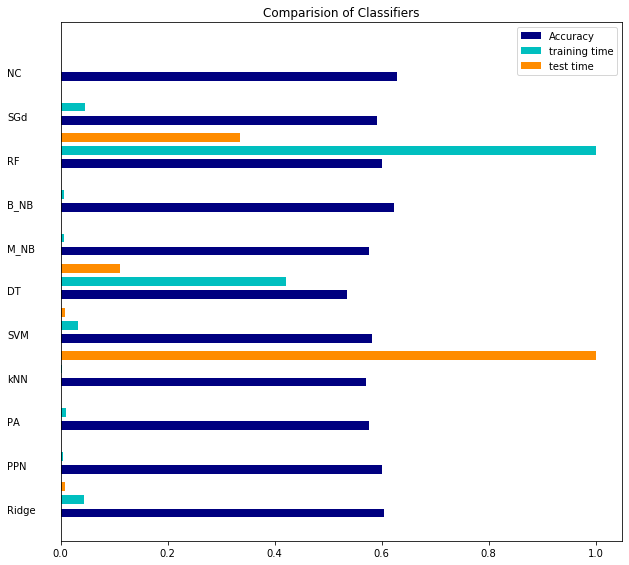

In [16]:
plt.figure(figsize=(12, 8))
plt.title("Comparision of Classifiers")
plt.barh(indices, score, .2, label="Accuracy", color='navy')
plt.barh(indices + .3, training_time, .2, label="training time",color='c')
plt.barh(indices + .6, test_time, .2, label="test time", color='darkorange')
plt.yticks(())
plt.legend(loc='best')
plt.subplots_adjust(left=.25)
plt.subplots_adjust(top=.95)
plt.subplots_adjust(bottom=.05)

for i, c in zip(indices, name1):
    plt.text(-.1, i, c)

plt.show()